# Продвинутый Python, семинар 3

**Лектор:** Петров Тимур

**Семинаристы:** Петров Тимур, Коган Александра, Романченко Полина

**Spoiler Alert:** в рамках курса нельзя изучить ни одну из тем от и до досконально (к сожалению, на это требуется больше времени, чем даже 3 часа в неделю). Но мы попробуем рассказать столько, сколько возможно :)

## Что сегодня делаем?

Продолжаем мучить данные с TFT. Давайте теперь исследовать наши данные с помощью визуализации!

И как мы говорили, здесь попробуем применить все силы seaborn, чтобы было красиво

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse

## Небольшое отсупление

На лекции меня попросили показать, как строятся линии уровней с помощью 3D-визуализаций в matplotlib. Сказано-сделано:

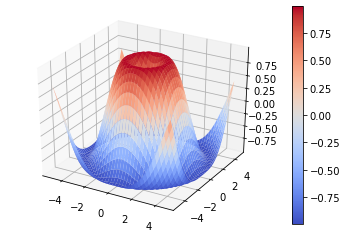

In [13]:
from matplotlib import cm # модуль для colomap

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y) #Делаем координатную сетку (то есть чтобы у нас были комбинации всех значений, как декартово произведение)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm) ##По координатной сетке строим значения Z, таким образом, получая то, что нам нужно
fig.colorbar(surf)

plt.show()

## А теперь к нашим баранам

Загрузим данные, заведем нужные нам столбцы

In [2]:
!wget https://github.com/Palladain/Deep_Python/raw/main/Seminars/Seminar_2/archive.zip

--2022-09-21 15:38:04--  https://github.com/Palladain/Deep_Python/raw/main/Seminars/Seminar_2/archive.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Palladain/Deep_Python/main/Seminars/Seminar_2/archive.zip [following]
--2022-09-21 15:38:04--  https://raw.githubusercontent.com/Palladain/Deep_Python/main/Seminars/Seminar_2/archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694969 (679K) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>] 678.68K  --.-KB/s    in 0.04s   

2022-09-21 15:38:04 (18.4 MB/s) - ‘archive.zip’ saved [694969/694969]


In [3]:
!unzip archive.zip

Archive:  archive.zip
  inflating: items.json              
  inflating: tft_3.5_last_500_gm_match_info.csv  
  inflating: tft_3.5_last_500_gm_unit_info.csv  
  inflating: traits.json             


In [4]:
heroes = pd.read_csv('tft_3.5_last_500_gm_unit_info.csv')

In [5]:
matches = pd.read_csv("tft_3.5_last_500_gm_match_info.csv")
matches["winner"] = (matches.placement <= 4).astype("int")
matches.game_datetime = matches.game_datetime.apply(lambda x: parse(x))
matches['hour'] = matches.game_datetime.apply(lambda x: x.hour)
matches['day'] = matches.game_datetime.apply(lambda x: x.day)

In [20]:
matches.head()

,match_id,puuid,challenger,galaxy,placement,game_datetime,Astro,Chrono,DarkStar,Set3_Celestial,...,Set3_Blademaster,Paragon,Protector,Set3_Sorcerer,StarGuardian,MechPilot,SpacePirate,winner,hour,day
0,NA1_3569517250,7AKHCtexkJJo8p04lg4shtx7n7R-uH6pQwPhBCEofkIJca...,0,Treasure Trove,1,2020-09-10 05:18:02,0,0,3,2,...,0,0,1,0,0,0,0,1,5,10
1,NA1_3569517250,0StQeXmDacsAikvEcY2ubarDZqzlEsaYsZHO6UT-UgBFY7...,0,Treasure Trove,2,2020-09-10 05:18:02,0,0,0,0,...,0,1,1,2,2,0,0,1,5,10
2,NA1_3569517250,Y0emdKI096n9-Rb0L4_I4pP_tmn_kwCtKiEjIsBRrxRqX_...,1,Treasure Trove,3,2020-09-10 05:18:02,0,1,0,0,...,0,0,0,0,0,0,0,1,5,10
3,NA1_3569517250,1vCCOdxLrdYa6NQRhywKKdZ0UNdX0nsa15Zpqo03k6QFs6...,1,Treasure Trove,4,2020-09-10 05:18:02,0,0,1,0,...,0,1,1,2,1,0,0,1,5,10
4,NA1_3569517250,mC0hMfKYhejc1U1aJE7iTOTn6TUDkY4apfQhdw2Pvp_jV3...,0,Treasure Trove,5,2020-09-10 05:18:02,0,0,0,1,...,0,1,1,0,0,0,0,0,5,10


Итак, в прошлый раз мы с вами обсуждали, что у нас challengers чаще побеждают. Давайте теперь попробуем это нарисовать и понять, а действительно ли это так.

Ради этого мы можем с вами нарисовать ящики с усами и проверить, насколько распределения challengers и остальных отличаются по занятому месту

### Задание 1

Нарисуйте ящик с усами и violinplot для challengers (на одном графике!)

Будем это делать теперь с помощью seaborn

In [27]:
sns.color_palette("tab10") #установим цвета (мне нравятся цвета из Tableau, поэтому возьму их)
sns.set_theme() # поставим дефолтную тему

Что мы сразу видим?

1. У нас медианы отличаются (для игроков более высокого уровня - 3, для остальных - 5)

2. Видим разброс другой (то есть от 3 до 7 места и от 2 до 5 места)

И благодаря violinplot становится еще понятнее, откуда идет скилл: у остальных распределение примерно одинаковое (то есть их место - это почти рандом), когда же у challengers мы видим более похожее на виолончель

Отлично, что-то уже накопали (и подтвердили). Идем дальше:

У нас есть колонки, которые мы никогда не трогали, давайте теперь пощупаем их

In [33]:
matches.columns #не щупали все от Astro до SpacePirate

Index(['match_id', 'puuid', 'challenger', 'galaxy', 'placement',
       'game_datetime', 'Astro', 'Chrono', 'DarkStar', 'Set3_Celestial',
       'Set3_Mystic', 'Sniper', 'Vanguard', 'Cybernetic', 'Infiltrator',
       'ManaReaver', 'Battlecast', 'Blaster', 'Set3_Brawler', 'Rebel',
       'Starship', 'Demolitionist', 'Mercenary', 'Set3_Blademaster', 'Paragon',
       'Protector', 'Set3_Sorcerer', 'StarGuardian', 'MechPilot',
       'SpacePirate', 'winner', 'hour', 'day'],
      dtype='object')

Это колонки с особенностями. По сути своей, особенность дает какой-то бонус некоторым чемпионам или всем сразу. Давайте посмотрим, есть ли какие-нибудь эффективные особенности. Как это сделать?

### Задание 2

Выберите любые все неизученные столбцы и посмотрите зависимость между местом и значением в столбце

Сделайте вывод, есть ли зависимость с какими-либо столбцами

То есть нам надо нарисовать 24 графика и посмотреть на них всех. В чем проблема?

Если бы это все было в одной колонке, то мы бы могли вызвать просто 1 отрисовку. А так нам надо отдельно для каждой колонки проводить свою отрисовку. Ну хорошо, давайте это сделаем

Выводы: Какие из указанных особенностей работают?

Теперь поисследуем часы и дни (не зря же их выносили)

### Задание 3

Посмотрите на динамику числа игр в разрезе часов и также отобразите число игр по дням, а также число игр по галактикам

(Первое можно сделать в помощью линий, второе - с помощью bar chart)

Ой как нехорошо получилось с галактиками! Давайте поправим этот момент!

**Как вы думаете, а почему получилось так странно со временем?**

**А какой вывод мы можем сделать из числа дней?**

**Обратите внимание, что мы никаким образом не анализировали и не использовали поле Galaxy в зависимости от места. Как вы думаете, почему? (подсказка: галактика общая для 1 игры)**


### Задание 4

Посмотрите зависимость среднего места между галактикой и местом для challengers и для не challengers

Ух ты ж, у нас легенда куда-то поехала, давайте поправим!

Класс, получили красивый график!

Вспомним, что у нас еще есть не только композиции, но и сами герои, а также предметы!

### Задание 5

Отобразите число героев по трейтам и отсортируйте по убыванию

Трейты - особенности самих героев. Находятся в полях traits_1, traits_2, traits_3

Как же это сделать, ведь у нас несколько колонок, с которыми надо считать? Для этого можем сделать конкатенацию этих трех полей и посчитать (каждый трейт героя - уникальный)

Выяснили, каких чемпионов у нас больше всего. Теперь давайте попробуем выяснить, а насколько хорош чемпион

У каждого чемпиона есть такая вещь как tier. Tier - это уровень чемпиона (он бывает в значениях от 1 до 3, чем больше - тем сильнее герой). Давайте теперь попробуем проделать следующую вещь:

### Задание 6

Возьмем и посчитаем для каждого чемпиона и его тира средний винрейт, а также частоту его встречаемости. Проверим - чем реже встречается герой, тем чаще ли он дает шанс на победу

Что же видим?

Наличие tier 3 и tier 2 героев дает нам больше шансов на победу. Следовательно, хотим больше героев tier 3, верно? Но получить их не так просто


### Задание 7

Исследуйте средней tier чемпионов на поле у игрока и его место в игре, сделайте выводы

## Выводы

Посмотрели на зависимости, распределения, поняли, что имеет значение, а что нет. Однако мы с вами не учли еще один фактор - это предметы! Но предметов так много, что рассматривать отдельно для каждого зависимость будет больно для головы. Хотелось бы интерактивности (чтобы можно было потыкать и посмотреть)

А вот это мы уже сделаем в следующий раз с помощью plotly :з

## Попугай дня

![Monk](https://upload.wikimedia.org/wikipedia/commons/b/b3/MonkParakeetsSantaPonsa.jpg)

А это Калита (или же попугай-монах)

Примечательны эти попугаи несколькими вещами:

1. Эти попугаи изначально заселяли только Южную Америку (Парагвай, южная часть Бразилии). Однако в 1970-х годах их начали массово привозить в Европу оттуда и пытались содержать как домашних животных. Но проблема в том, что они до боли крикливые, и поэтому их просто выпускали, что привело к тому, что они стали размножаться и жить в Европе и стали что-то типа голубей (в той же Барселоне или Мадриде)

2. Единственные попугаи, которые гнездятся на ветвях деревьях (а не в дуплах или укрытиях). Строят они их коллектиквом (получается типа коммуналки), которая может весить до 200кг

3. А называются они монахами, потому что их окрас напоминает одежду квакеров (это религиозный орден, но подходяшей картинки для сравнения я не нашел). Собственно, в Аргентине их и зовут "попугаи квакеры"